In [1]:
!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery




Dataset URL: https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery
License(s): CC0-1.0
 74% 22.0M/29.6M [00:00<00:00, 104MB/s]
100% 29.6M/29.6M [00:00<00:00, 125MB/s]


In [2]:
!unzip semantic-segmentation-of-aerial-imagery.zip -d /content/Dubai


Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: /content/Dubai/Semantic segmentation dataset/Tile 1/masks/image_part_001.png  
  inflating: /con

In [3]:
!pip install patchify

In [4]:
# Install Libararies
!pip install -U -q segmentation-models
!pip install keract
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2

In [6]:
#Imports
from matplotlib import pyplot as plt
import os
import cv2
from patchify import patchify
from sklearn.model_selection import train_test_split
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot, plot_model, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import concatenate, BatchNormalization, Dropout, Lambda

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, ZeroPadding2D, Dropout, Lambda
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D

from tensorflow.keras import applications
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger, LearningRateScheduler
import keract as ke
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

from tensorflow.keras.metrics import MeanIoU
import pickle
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import re, sys, random, shutil
#import albumentations as A
from IPython.display import SVG
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import gradio as gr
from keras.models import load_model
#import time

In [7]:
#Functions
# Convert RGB to labels
def convert_RGB_to_label(label):
  label_seg = np.zeros(label.shape, dtype=np.uint8)
  label_seg[np.all(label == waters_class, axis=-1)] = 0
  label_seg[np.all(label == lands_class, axis=-1)] = 1
  label_seg[np.all(label == roads_class, axis=-1)] = 2
  label_seg[np.all(label == buildings_class, axis=-1)] = 3
  label_seg[np.all(label == vegetations_class, axis=-1)] = 4
  label_seg[np.all(label == unlabeled_features_class, axis=-1)] = 5
  label_seg = label_seg[:,:,0]
  return label_seg

def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)

#loss equation
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

def predict_image(image_source):
  image = np.expand_dims(image_source, 0)
  prediction = model_loaded.predict(image)
  image_predicted = np.argmax(prediction, axis=3)
  image_predicted = image_predicted[0,:,:]
  image_predicted = image_predicted * 50
  return 'Predicted Image', image_predicted

In [8]:
dataset_directory = '/content/Dubai/'
dataset_title = 'Semantic segmentation dataset'

In [9]:
#Explore the dataset images and masks
for path, subdirs, files in os.walk(os.path.join(dataset_directory, dataset_title)):
  dir_name = path.split(os.path.sep)[-1]
  if dir_name == 'masks':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):
        a = True

In [10]:
# Processing Images
#read image
#set the patch size to be 256*256
images_patch_size = 256
image = cv2.imread(f'{dataset_directory}/{dataset_title}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [11]:
#Patchify Images
#using patchify to split images into small overlappable patches by given patch cell size,
#and merge patches into Satellite Image.
image_patches = patchify(image, (images_patch_size, images_patch_size, 3), step=images_patch_size)
len(image_patches)
minmaxscaler = MinMaxScaler()
image_x = image_patches[0,0,:,:]
#Normalizing Images using MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
image_y[0].shape

(256, 256, 3)

In [12]:
#Processing Images and mask images
"""
The images were processed to have sizes that are multiples of the patch sizes,
allowing them to be split into smaller patches for individual processing.
To handle variations in image sizes, they were cropped to the nearest size divisible by 256
before being divided into patches of 256x256x3.
"""
images_dataset = []
masks_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_ext = 'jpg'
  elif image_type == 'masks':
     image_ext = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_directory}/{dataset_title}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_ext}',1)
      if image is not None:
        if image_type == 'masks': # read images in BGR
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//images_patch_size)*images_patch_size
        size_y = (image.shape[0]//images_patch_size)*images_patch_size
        image = Image.fromarray(image)
        # crop images
        image = image.crop((0,0, size_x, size_y))
        image = np.array(image)
        #Extract patches for each image
        images_patched = patchify(image, (images_patch_size, images_patch_size, 3), step=images_patch_size)
        for i in range(images_patched.shape[0]):
          for j in range(images_patched.shape[1]):
            if image_type == 'images':
              single_patched_image = images_patched[i,j,:,:]
              #Normalize images
              single_patched_image = minmaxscaler.fit_transform(single_patched_image.reshape(-1, single_patched_image.shape[-1])).reshape(single_patched_image.shape)
              single_patched_image = single_patched_image[0]
              images_dataset.append(single_patched_image)
            elif image_type == 'masks':
              single_patched_mask = images_patched[i,j,:,:]
              #Drop the extra unneeded dimension
              single_patched_mask = single_patched_mask[0]
              masks_dataset.append(single_patched_mask)

945
945


(945, 256, 256, 3)

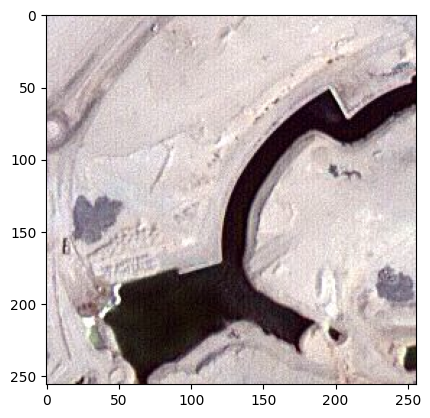

In [13]:
#Rendering one Image
print(len(images_dataset))
print(len(masks_dataset))
np.array(images_dataset)
images_dataset = np.array(images_dataset)
masks_dataset = np.array(masks_dataset)
images_dataset[8].shape
plt.imshow(images_dataset[8])
masks_dataset.shape

In [14]:
# Render random 5 images and its masks
for i in range(0,5):
  image_random = random.randint(0, len(images_dataset))
  #image_random=i
  plt.figure(figsize=(16,10))
  plt.subplot(121)
  plt.imshow(images_dataset[image_random])
  plt.subplot(122)
  plt.imshow(masks_dataset[image_random])

Output hidden; open in https://colab.research.google.com to view.

In [15]:
roads_class = '#6EC1E4'.lstrip('#')
roads_class = np.array(tuple(int(roads_class[i:i+2], 16) for i in (0,2,4)))

vegetations_class = '#FEDD3A'.lstrip('#')
vegetations_class = np.array(tuple(int(vegetations_class[i:i+2], 16) for i in (0,2,4)))

buildings_class = '#3C1098'.lstrip('#')
buildings_class = np.array(tuple(int(buildings_class[i:i+2], 16) for i in (0,2,4)))

waters_class = '#E2A929'.lstrip('#')
waters_class = np.array(tuple(int(waters_class[i:i+2], 16) for i in (0,2,4)))

lands_class = '#8429F6'.lstrip('#')
lands_class = np.array(tuple(int(lands_class[i:i+2], 16) for i in (0,2,4)))

unlabeled_features_class = '#9B9B9B'.lstrip('#')
unlabeled_features_class = np.array(tuple(int(unlabeled_features_class[i:i+2], 16) for i in (0,2,4)))

In [16]:
#Convert RGB to Label
label = single_patched_mask
labels = []
for i in range(masks_dataset.shape[0]):
  label = convert_RGB_to_label(masks_dataset[i])
  labels.append(label)
print(len(labels))

945


In [17]:
#Converted the Hex colors of Spatial features to RGB then converted the RGB to labels 0 to 5.
#Therefore, each spatial feature of the masks is labeled from 0 to 5.
labels = np.array(labels)
labels[3]
labels = np.expand_dims(labels, axis=3)
np.unique(labels)
print("Count of unique labels of masks ",format(np.unique(labels)))

Count of unique labels of masks  [0 1 2 3 4 5]


In [18]:
# Render random 5 images and its masks
for i in range(0,5):
  image_random = random.randint(0, len(images_dataset))
  #image_random=i
  plt.figure(figsize=(16,10))
  plt.subplot(121)
  plt.imshow(images_dataset[image_random])
  plt.subplot(122)
  plt.imshow(masks_dataset[image_random])

Output hidden; open in https://colab.research.google.com to view.

In [19]:
labels[0][:,:,0]
count_classes = len(np.unique(labels))
#count_classes
labels_categorical_dataset = to_categorical(labels, num_classes=count_classes)
labels_categorical_dataset.shape
images_dataset.shape

(945, 256, 256, 3)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images_dataset, labels_categorical_dataset, test_size=0.20, random_state=100)

In [21]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
n_classes = y_train.shape[3]
image_channels = X_train.shape[3]

In [22]:
#length of training data
len(X_test)

189

In [26]:
# prompt: build U-Net Model make a more simple one

def UNET_model(n_classes=6, image_height=256, image_width=256, image_channels=1):
  inputs = Input((image_height, image_width, image_channels))
  source_input = inputs

  # Encoder
  c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
  c1 = Dropout(0.1)(c1)
  c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = MaxPooling2D((2, 2))(c1)

  c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = Dropout(0.1)(c2)
  c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = MaxPooling2D((2, 2))(c2)

  # Bottleneck
  c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

  # Decoder
  u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
  u4 = concatenate([u4, c2])
  c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
  c4 = Dropout(0.1)(c4)
  c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

  u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
  u5 = concatenate([u5, c1])
  c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
  c5 = Dropout(0.1)(c5)
  c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c5)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

  model.summary()


In [27]:
def get_UNET_model():
  return UNET_model(n_classes=n_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [28]:
model = get_UNET_model()
#model.get_config()

In [ ]:

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [29]:
# Model compilation
tf.keras.backend.clear_session()
model.compile(optimizer='adam', loss=total_loss, metrics=["accuracy", jaccard_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [30]:
unet_model_history = model.fit(X_train, y_train,
                          batch_size=8, #The batch size defines the number of samples that will be propagated through the network.
                          epochs=10,
                          validation_data=(X_test, y_test),
                          verbose=1,
                          shuffle=False)

Epoch 1/10
95/95 [==============================] - 70s 705ms/step - loss: 0.9861 - accuracy: 0.6508 - jaccard_coef: 0.3499 - val_loss: 0.9782 - val_accuracy: 0.6866 - val_jaccard_coef: 0.4419
Epoch 2/10
95/95 [==============================] - 66s 692ms/step - loss: 0.9575 - accuracy: 0.7477 - jaccard_coef: 0.4970 - val_loss: 0.9646 - val_accuracy: 0.7158 - val_jaccard_coef: 0.4617
Epoch 3/10
95/95 [==============================] - 65s 684ms/step - loss: 0.9527 - accuracy: 0.7589 - jaccard_coef: 0.5221 - val_loss: 0.9586 - val_accuracy: 0.7300 - val_jaccard_coef: 0.5016
Epoch 4/10
95/95 [==============================] - 66s 692ms/step - loss: 0.9493 - accuracy: 0.7689 - jaccard_coef: 0.5427 - val_loss: 0.9557 - val_accuracy: 0.7391 - val_jaccard_coef: 0.5070
Epoch 5/10
95/95 [==============================] - 65s 682ms/step - loss: 0.9446 - accuracy: 0.7836 - jaccard_coef: 0.5756 - val_loss: 0.9551 - val_accuracy: 0.7566 - val_jaccard_coef: 0.5494
Epoch 6/10
95/95 [=================

In [32]:
history = unet_model_history
history.history

{'loss': [0.9861151576042175,
  0.9575302600860596,
  0.9526716470718384,
  0.9493043422698975,
  0.9445598125457764,
  0.9417861104011536,
  0.9379874467849731,
  0.9358800649642944,
  0.933476448059082,
  0.930526077747345],
 'accuracy': [0.6507529020309448,
  0.7476915121078491,
  0.7589026689529419,
  0.7689012289047241,
  0.7835996747016907,
  0.7931258678436279,
  0.8021905422210693,
  0.8088140487670898,
  0.8143461346626282,
  0.8218648433685303],
 'jaccard_coef': [0.3498575985431671,
  0.4969567656517029,
  0.5220698118209839,
  0.5427448749542236,
  0.5756042003631592,
  0.5881410837173462,
  0.606385350227356,
  0.6183524131774902,
  0.6275600790977478,
  0.641628086566925],
 'val_loss': [0.9782087802886963,
  0.9646448493003845,
  0.958617627620697,
  0.9556922912597656,
  0.9550854563713074,
  0.9514806270599365,
  0.9547713398933411,
  0.9489752650260925,
  0.9399047493934631,
  0.9366521835327148],
 'val_accuracy': [0.6866267919540405,
  0.7158380150794983,
  0.729968607

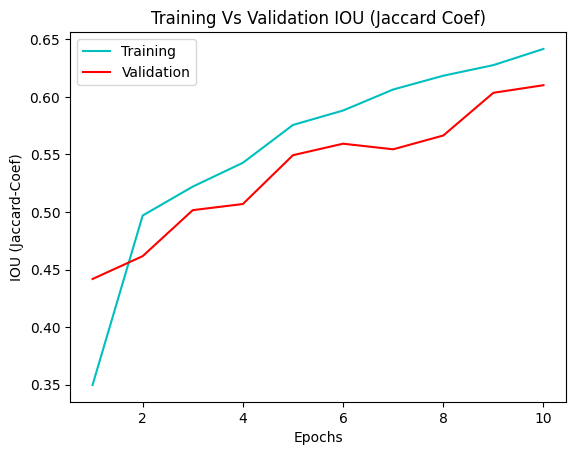

In [33]:

jaccard_coef = history.history['jaccard_coef']
val_jaccard_coef = history.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'c', label="Training")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation")
plt.title("Training Vs Validation IOU (Jaccard Coef)")
plt.xlabel("Epochs")
plt.ylabel("IOU (Jaccard-Coef)")
plt.legend()
plt.show()

In [34]:
#unet_model_history.params
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

6/6 [==============================] - 2s 321ms/step


In [35]:
for i in range(15):
  #test_image_num = random.randint(0, len(X_test))
  test_image_num=i
  test_image = X_test[test_image_num]
  test_image_num=i
  ground_image = y_test_argmax[test_image_num]
  test_image_np = np.expand_dims(test_image, 0)
  prediction = model.predict(test_image_np)
  image_predicted = np.argmax(prediction, axis=3)
  image_predicted = image_predicted[0,:,:]
  plt.figure(figsize=(16,10))
  plt.subplot(231)
  plt.title("Satellite Image")
  plt.imshow(test_image)
  plt.subplot(232)
  plt.title("Masked image")
  plt.imshow(ground_image)
  plt.subplot(233)
  plt.title("Predicted Image")
  plt.imshow(image_predicted)

Output hidden; open in https://colab.research.google.com to view.